# Визуализация.

Датасет представляет собой коллекцию медицинских и демографических данных пациентов, а также их статус диабета (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения, уровень HbA1c и уровень глюкозы в крови. 

В будущем этот датасет может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.

Описание столбцов:

|Название| Описание |
|--|--|
|`gender`| Пол пациента |
|`age`| Возраст |
|`hypertension`| Гипертония —  это состояние, при котором кровяное давление в артериях постоянно повышено. Он принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 —  наличие гипертонии. |
|`heart_disease`| Болезни сердца —  это еще одно состояние, которое связано с повышенным риском развития диабета. Он также принимает значения 0 или 1, где 0 означает отсутствие сердечных заболеваний, а 1 —  наличие сердечных заболеваний. |
|`smoking_history`| Опыт курения —  также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. | 
|`bmi`| Это показатель количества жира в организме, основанный на весе и росте. Более высокие значения ИМТ связаны с повышенным риском развития диабета. Диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 —  это недостаточный вес, 18,5-24,9 —  нормальный, 25-29,9 —  избыточный вес, а 30 и более —  ожирение. |
|`HbA1c_level`| Уровень HbA1c (гемоглобин A1c) —  это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет. | 
|`blood_glucose_level`| Уровень глюкозы в крови —  это количество глюкозы в крови в определенный момент времени. Высокий уровень глюкозы в крови является основным признаком диабета. |
|`diabetes`| Диабет является целевой переменной (таргетом), при этом значение 1 указывает на наличие диабета, а 0 —  на его отсутствие. |

## Задание

Проведите визуализацию данных и попробуйте выяснить причины, от чего и с чем связаны основные причины наличия диабета у людей.

Ваша цель —  визуально с помощью графиков определить и доказать, что при наличии какого-либо фактора возможен риск развития диабета.

Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных (при необходимости)
2. Описательный анализ данных, просмотр данных
3. Построение гистограмм числовых переменных
4. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
5. Построение столбчатых диаграмм для категориальных переменных
6. Построение матрицы корреляции признаков (Phik или Пирсона)
7. Сравнение двух выборок
8. Общий вывод

## Загрузка данных

In [24]:
### импортируйте нужные библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
df = pd.read_csv('data/lab_rab_3_diabetes_prediction_dataset.csv')

In [26]:
# Print the first few rows of the dataset
print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


## Описательный анализ данных

Рассмотрите данные —  изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [27]:
print(df.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

**Вывод:**

## Предобработка данных

### Дубликаты

Предобработайте датасет —  проверьте на наличие дубликатов и удалите, если они есть.

In [28]:
df_no_duplicates = df.drop_duplicates()
print(df_no_duplicates)


       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99994  Female  36.0             0              0         No Info  24.60   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [29]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [30]:
def optimize_dtypes(df):
    # Создаем копию DataFrame
    df_optimized = df.copy()

    # Оптимизация типов данных
    df_optimized['age'] = df_optimized['age'].astype(np.int8)  # Преобразуем в int8, если значения в диапазоне
    df_optimized['hypertension'] = df_optimized['hypertension'].astype(np.int8)  # int8 для 0 и 1
    df_optimized['heart_disease'] = df_optimized['heart_disease'].astype(np.int8)  # int8 для 0 и 1
    df_optimized['bmi'] = df_optimized['bmi'].astype(np.float32)  # float32 для уменьшения памяти
    df_optimized['HbA1c_level'] = df_optimized['HbA1c_level'].astype(np.float32)  # float32 для уменьшения памяти
    df_optimized['blood_glucose_level'] = df_optimized['blood_glucose_level'].astype(np.int16)  # int16 для диапазона
    df_optimized['diabetes'] = df_optimized['diabetes'].astype(np.int8)  # int8 для 0 и 1

    # Столбцы gender и smoking_history остаются как object
    # Возвращаем оптимизированный DataFrame
    return df_optimized

# Пример использования
# df — это ваш исходный DataFrame
optimized_df = optimize_dtypes(df)

# Выводим информацию о оптимизированном DataFrame
print(optimized_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int8   
 2   hypertension         100000 non-null  int8   
 3   heart_disease        100000 non-null  int8   
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float32
 6   HbA1c_level          100000 non-null  float32
 7   blood_glucose_level  100000 non-null  int16  
 8   diabetes             100000 non-null  int8   
dtypes: float32(2), int16(1), int8(4), object(2)
memory usage: 2.9+ MB
None


In [31]:
def optimize_dtypes(df):
    # Создаем копию DataFrame
    df_optimized = df.copy()

    # Оптимизация типов данных
    df_optimized['age'] = df_optimized['age'].astype(np.int8)  # Преобразуем в int8, если значения в диапазоне
    df_optimized['hypertension'] = df_optimized['hypertension'].astype(np.int8)  # int8 для 0 и 1
    df_optimized['heart_disease'] = df_optimized['heart_disease'].astype(np.int8)  # int8 для 0 и 1
    df_optimized['bmi'] = df_optimized['bmi'].astype(np.float32)  # float32 для уменьшения памяти
    df_optimized['HbA1c_level'] = df_optimized['HbA1c_level'].astype(np.float32)  # float32 для уменьшения памяти
    df_optimized['blood_glucose_level'] = df_optimized['blood_glucose_level'].astype(np.int16)  # int16 для диапазона
    df_optimized['diabetes'] = df_optimized['diabetes'].astype(np.int8)  # int8 для 0 и 1

    # Столбцы gender и smoking_history остаются как object
    # Возвращаем оптимизированный DataFrame
    return df_optimized

# Пример использования
# df — это ваш исходный DataFrame
optimized_df = optimize_dtypes(df)

# Выводим информацию о оптимизированном DataFrame
print(optimized_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int8   
 2   hypertension         100000 non-null  int8   
 3   heart_disease        100000 non-null  int8   
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float32
 6   HbA1c_level          100000 non-null  float32
 7   blood_glucose_level  100000 non-null  int16  
 8   diabetes             100000 non-null  int8   
dtypes: float32(2), int16(1), int8(4), object(2)
memory usage: 2.9+ MB
None


**Вывод:**
* `age` : Преобразование из  `float64`  в  `int8`  позволяет сэкономить память, так как  `int8`  занимает 1 байт вместо 8 байт для  `float64` . Это возможно, если все значения возраста находятся в диапазоне от 0 до 255. 
 
* `hypertension` ,  `heart_disease` ,  `diabetes` : Эти столбцы также были преобразованы в  `int8` , что позволяет сократить использование памяти, так как они содержат только бинарные значения (0 и 1). 
 
* `bmi` ,  `HbA1c_level`: Преобразование из  `float64`  в  `float32`  также экономит память, так как  `float32`  занимает 4 байта вместо 8 байт. 
 
* `blood_glucose_level` : Преобразование из  `int64`  в  `int16`  позволяет сэкономить память, если значения находятся в диапазоне от 0 до 65535. 

*Использование памяти с **7-и мб** упало до **3-х** мб*

## Визуализация

Построим графики:

1. Построение гистограмм числовых переменных
2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
3. Построение столбчатых диаграмм для категориальных переменных
4. Построение матрицы корреляции признаков (Phik или Пирсона)

После построения опишите выборку. Что она из себя представляет? Есть ли зависимости?

In [ ]:
# Построение гистограмм
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Гистограмма {col}')
plt.tight_layout()
plt.show()

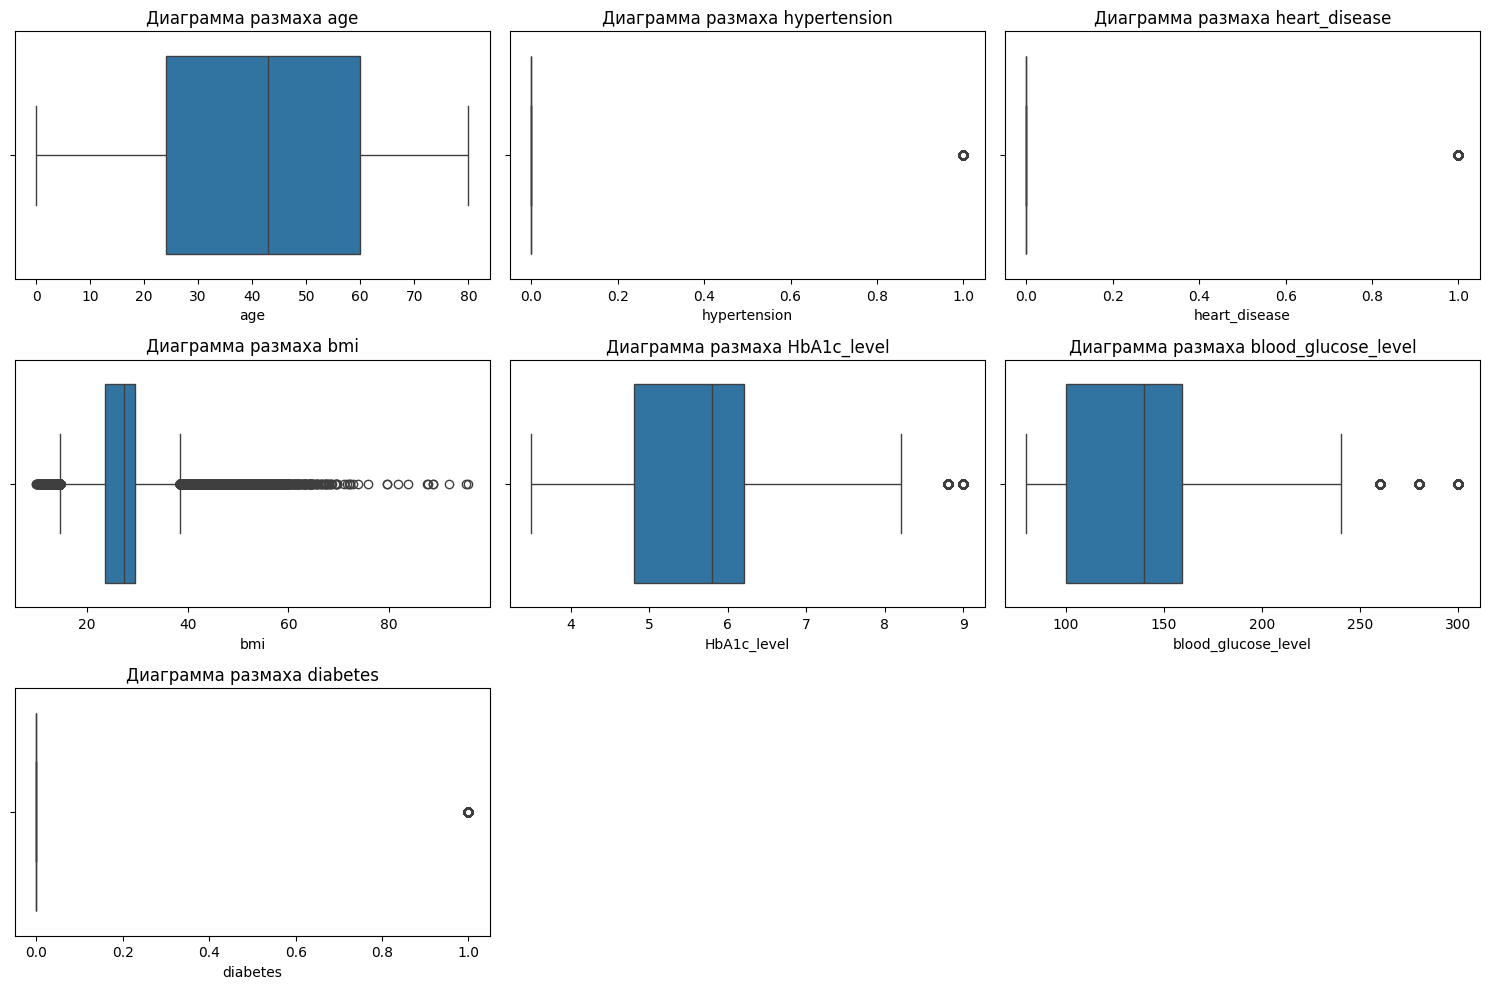

In [10]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Диаграмма размаха {col}')
plt.tight_layout()
plt.show()

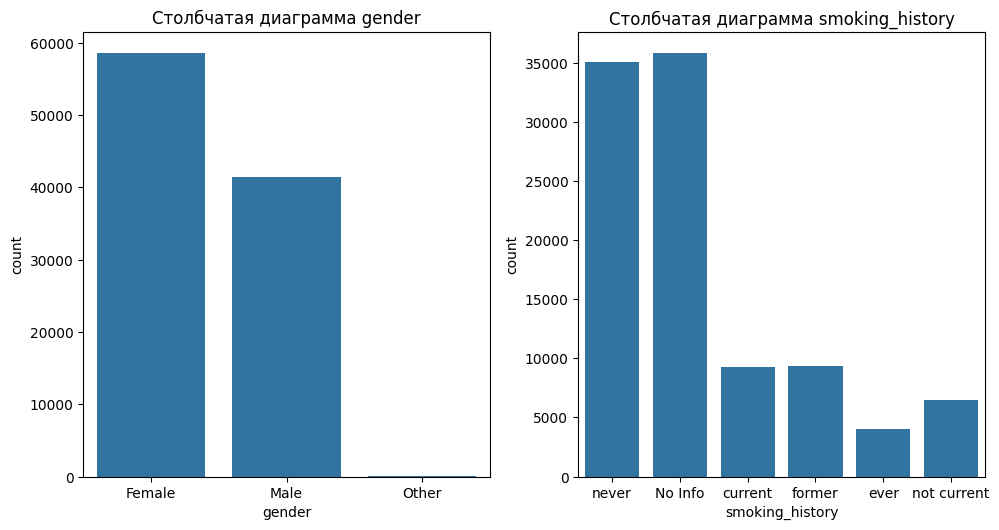

In [11]:
cat_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df[col])
    plt.title(f'Столбчатая диаграмма {col}')
plt.tight_layout()
plt.show()

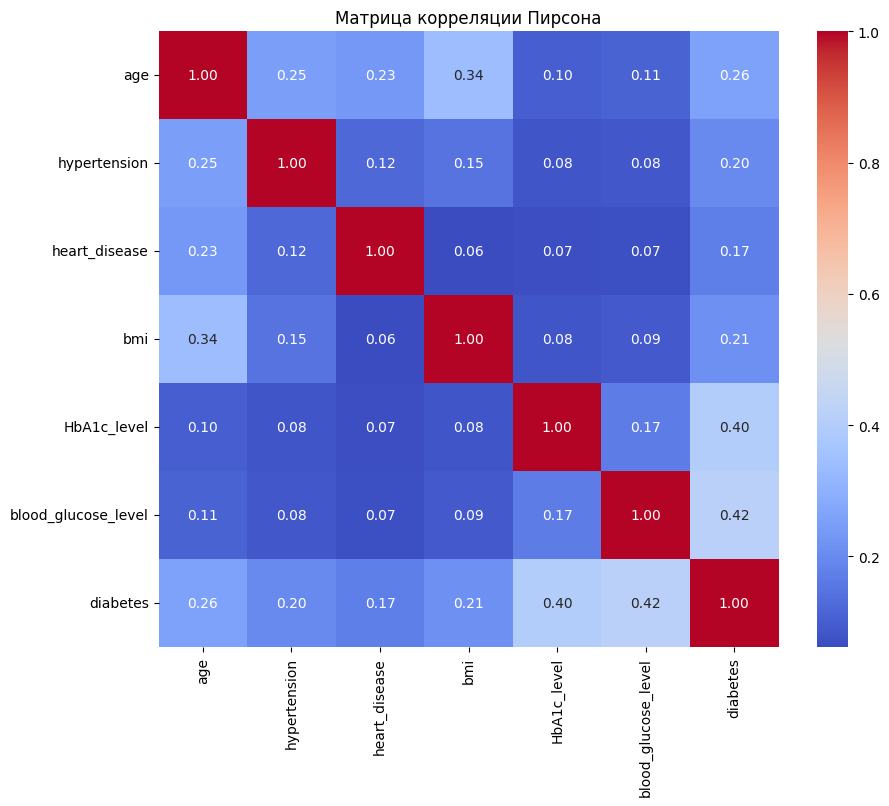

In [12]:
# Матрица корреляции
correlation_matrix = df[num_cols].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляции Пирсона')
plt.show()

**Вывод:**

## Сравнение выборок

После построения всех типов графиков, необходимо провести анализ:

Отобразите на одном графике две выборки — люди с диабетом и без и сравните их.

1. Для числовых признаков — гистограммы и ящики с усами.
2. Для категориальных — столбчатые диаграммы.

После напишите вывод, есть ли какая-то зависимость?

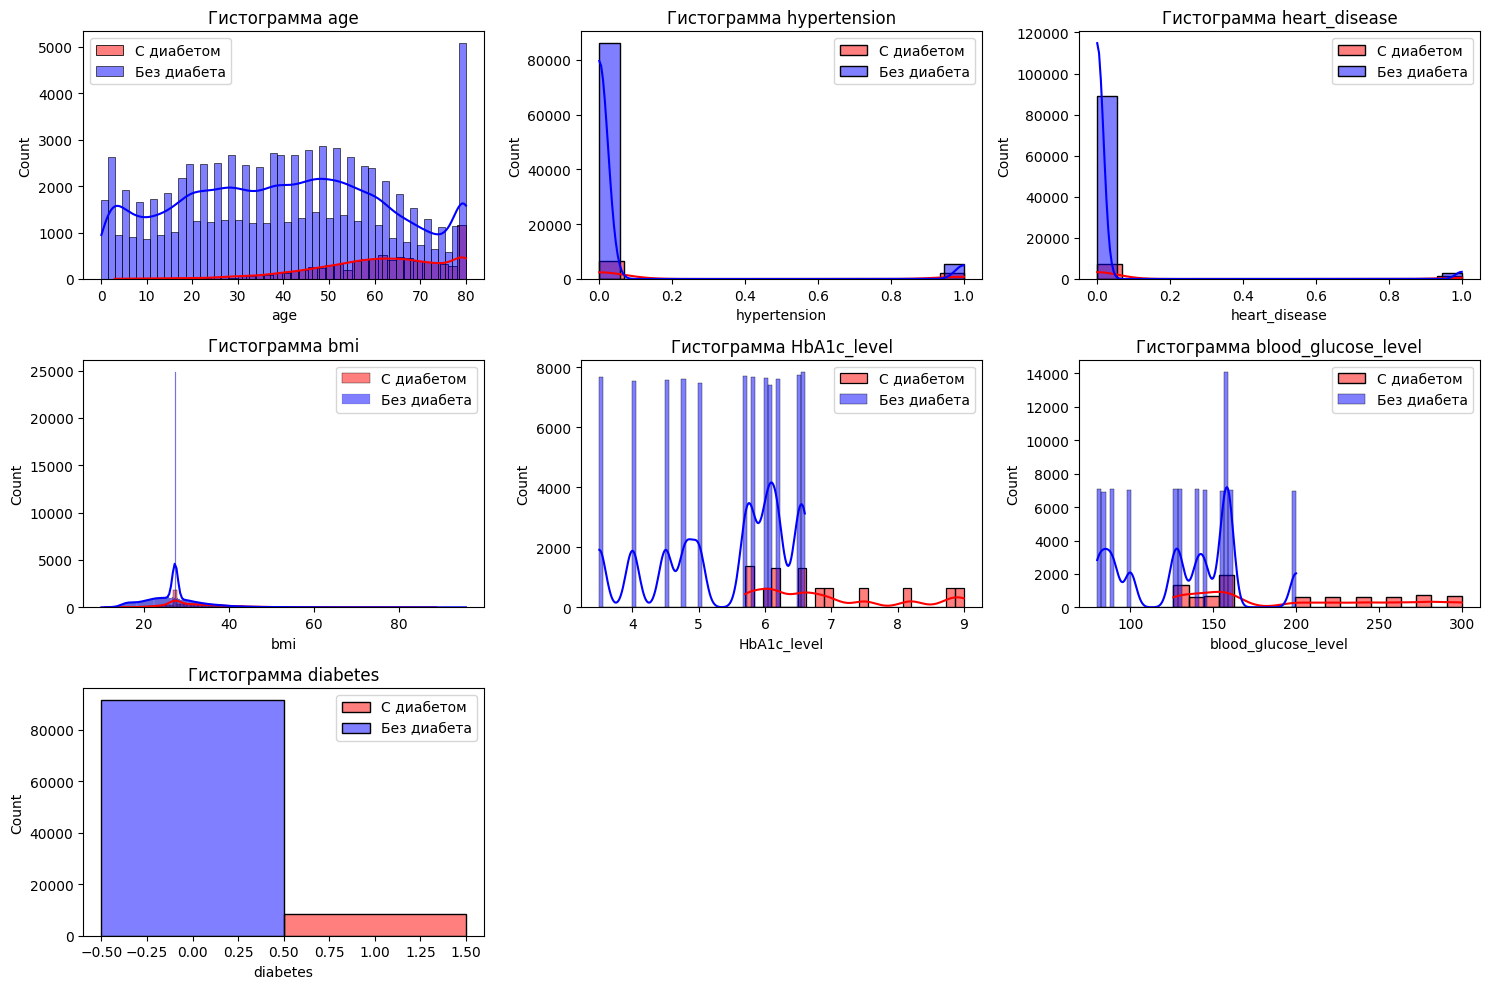

C:\Users\vlad9\AppData\Local\Temp\ipykernel_18028\343555656.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=col, data=df, palette=["blue", "red"])
C:\Users\vlad9\AppData\Local\Temp\ipykernel_18028\343555656.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=col, data=df, palette=["blue", "red"])
C:\Users\vlad9\AppData\Local\Temp\ipykernel_18028\343555656.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y=col, data=df, palette=["blue", "red"])
C:\Users\vlad9\AppData\Local\Temp\ipykernel

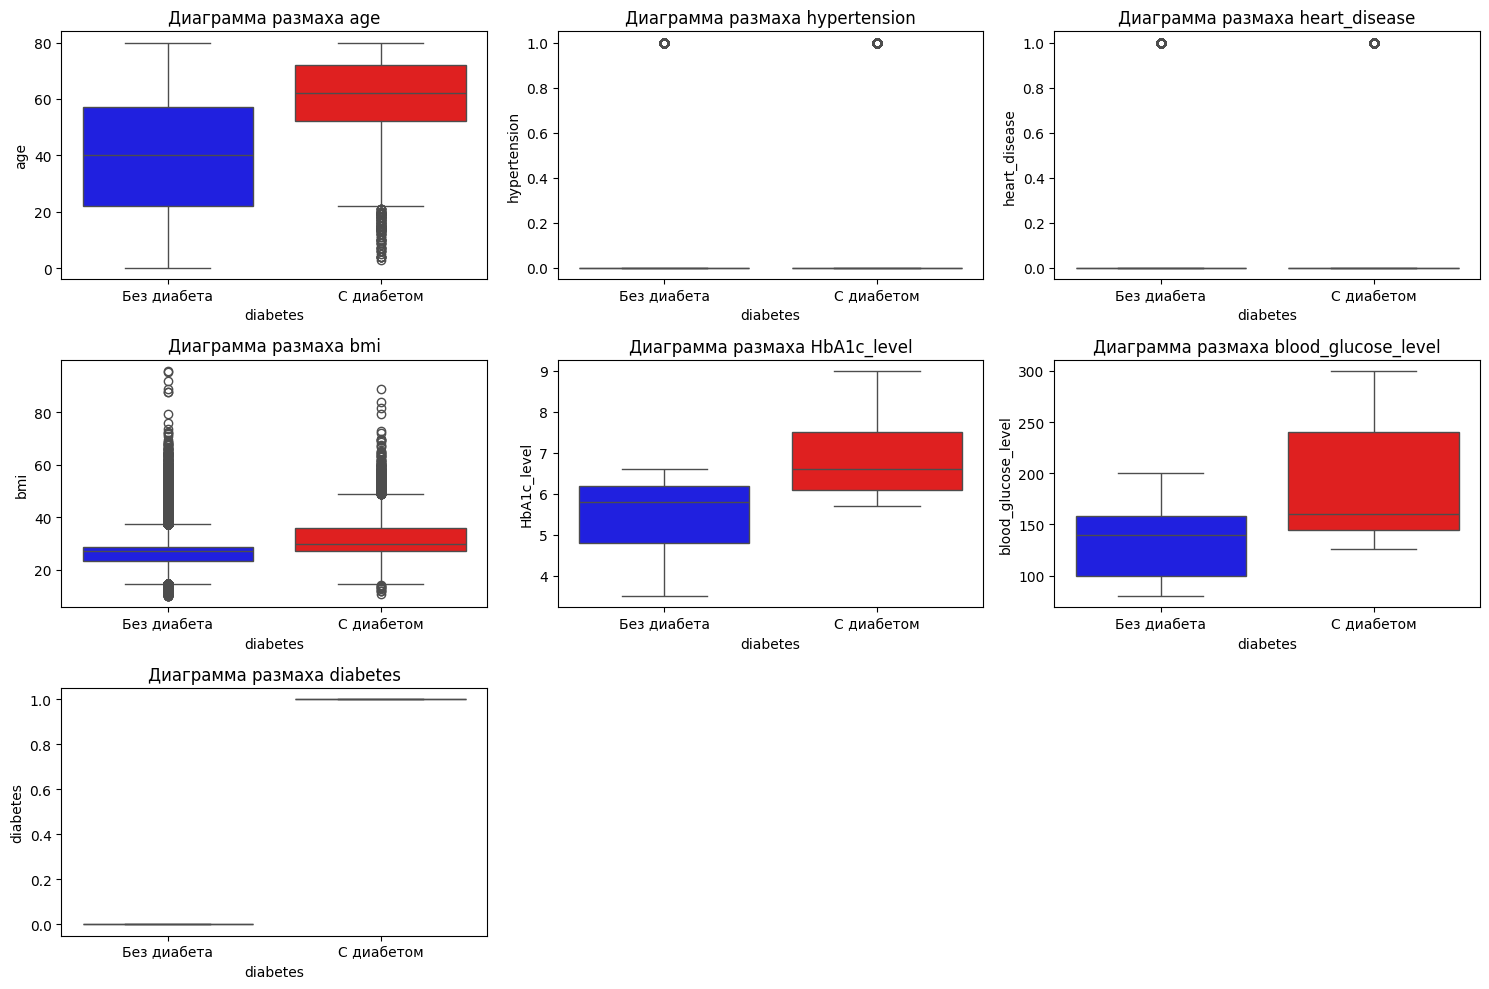

In [13]:
# Разделяем выборки на людей с диабетом и без диабета
diabetes_yes = df[df['diabetes'] == 1]
diabetes_no = df[df['diabetes'] == 0]

# Числовые признаки
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Построение гистограмм
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(diabetes_yes[col], color='red', kde=True, label='С диабетом', alpha=0.5)
    sns.histplot(diabetes_no[col], color='blue', kde=True, label='Без диабета', alpha=0.5)
    plt.title(f'Гистограмма {col}')
    plt.legend()
plt.tight_layout()
plt.show()

# Построение ящиков с усами
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='diabetes', y=col, data=df, palette=["blue", "red"])
    plt.xticks([0, 1], ['Без диабета', 'С диабетом'])
    plt.title(f'Диаграмма размаха {col}')
plt.tight_layout()
plt.show()

In [17]:
import statsmodels.api as sm
# Определите зависимую и независимые переменные
X = df[['age']]  # Возраст как независимая переменная
y = df['diabetes']  # Диабет как зависимая переменная

# Добавьте константу для модели
X = sm.add_constant(X)

# Создайте модель логистической регрессии
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.254164
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99998
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Oct 2024   Pseudo R-squ.:                  0.1260
Time:                        15:41:32   Log-Likelihood:                -25416.
converged:                       True   LL-Null:                       -29081.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9369      0.041   -120.095      0.000      -5.017      -4.856
age            0.0499      0.

**Вывод:**
На диабет влияют следующие показатели:
* `HbA1c_level` или же `Уровень гемоглобина` - До **5.7%** считается *нормой*. если этот уровень **>= 6.5%** То это уже считается *Диагнаститечским уровнем Диабета*
* `blood_glucose_level` или же `Уровень глюкозы в крови` - Не знаю как проводились замеры, на тощак или нет, но нужно учитывать, что **после еды** уровень глюкозы в крови должен быть **<= 150***мг/дм* или **7.8***ммоль/л* **до еды** этот показатель будет *от **70** до **130*** *мг/дм* у здорового человека, все что выше этих показателей уже ялвяется диабетом 1/2 степени
* `bmi` или же `Индекс Массы Тела(ИМТ)` - В подборке в основе были подобраны люди со значением **ИМТ** выше **20**, что является нормой? от **19** до **25**. Всё что выше это уже избыточный вес(*от **25** до **30***) и ожирение(*от **30***)
* `age`или же  `Возраст` - Коэффициент риска заболевания диабетом возврастает на **0.049%** каждый год

## ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но даёт ли этот результат полную картину? Наша цель — узнать, каков риск возникновения диабета у пациента.

Ваша задача — воспользоваться ранее приобретенными навыками и дополнить общий вывод. 

**Этапы:**

1) Разделите выборки и постройте дополнительные графики. Может стоит разделить на несколько выборок и сравнить графики там?
2) Постройте `pairplot` с параметром `hue=='diabetes'`. Может там тоже где-то кроется истина?
2) Постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
3) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах: